In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

path = "/content/drive/MyDrive/bosch"
os.listdir(path)


['train_numeric.csv',
 'test_numeric.csv',
 'sample_submission.csv',
 'train_date.csv',
 'test_date.csv',
 'test_categorical.csv',
 'train_categorical.csv']

In [3]:
import pandas as pd

sample = pd.read_csv(
    "/content/drive/MyDrive/bosch/train_numeric.csv",
    nrows=1000
)

sample.head()


,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
##컬럼구조확인
sample.shape


(1000, 970)

In [5]:
#target컬럼확인
sample.columns[-5:]


Index(['L3_S51_F4256', 'L3_S51_F4258', 'L3_S51_F4260', 'L3_S51_F4262',
       'Response'],
      dtype='object')

In [6]:
#불량데이터
sample['Response'].value_counts()


,count
Response,
0,996
1,4


In [7]:
sample['Response'].value_counts(normalize=True)

,proportion
Response,
0,0.996
1,0.004


In [8]:
#날짜데이터
date_sample = pd.read_csv(
    "/content/drive/MyDrive/bosch/train_date.csv",
    nrows=1000
)

date_sample.head()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#전체 공정시간계산
date_sample['start_time'] = date_sample.iloc[:, 1:].min(axis=1)
date_sample['end_time'] = date_sample.iloc[:, 1:].max(axis=1)

date_sample['process_time'] = (
    date_sample['end_time'] - date_sample['start_time']
)

In [10]:
#response 붙이기
date_sample['Response'] = sample['Response']

In [11]:
#평균공정시간비교
date_sample.groupby('Response')['process_time'].mean()

,process_time
Response,
0,9.913025
1,5.110000


In [13]:
#각 제품이 몇 개 공정(station)을 통과했는지
date_sample['station_count'] = date_sample.iloc[:, 1:-4].notna().sum(axis=1)

In [14]:
date_sample.groupby('Response')['station_count'].mean()

,station_count
Response,
0,205.151606
1,203.500000


In [15]:
#공정 구간별 시간 패턴 분석
date_sample[['process_time','Response']].describe()

,process_time,Response
count,999.000000,1000.000000
mean,9.893794,0.004000
std,18.854117,0.063151
min,0.020000,0.000000
25%,1.600000,0.000000
50%,3.250000,0.000000
75%,9.640000,0.000000
max,373.880000,1.000000


In [16]:
#공정 시간이 긴 제품이 불량일까?
date_sample['long_process'] = date_sample['process_time'] > 20

In [17]:
pd.crosstab(date_sample['long_process'], date_sample['Response'], normalize='index')

Response,0,1
long_process,,
False,0.995294,0.004706
True,1.000000,0.000000


In [18]:
#불량 제품은 특정 구간에서 시간이 짧을까?
#각 제품의 첫 공정 도착 시간 비교
date_sample.groupby('Response')['start_time'].mean()


,start_time
Response,
0,844.29407
1,677.93750


In [19]:
import pandas as pd

N = 50000
base_path = "/content/drive/MyDrive/bosch"

num = pd.read_csv(f"{base_path}/train_numeric.csv", nrows=N, usecols=['Id','Response'])
date = pd.read_csv(f"{base_path}/train_date.csv", nrows=N)

# 시간 feature
date['start_time'] = date.iloc[:, 1:].min(axis=1)
date['end_time'] = date.iloc[:, 1:].max(axis=1)
date['process_time'] = date['end_time'] - date['start_time']

# 경로 feature(측정된 공정 수)
date['station_count'] = date.iloc[:, 1:-3].notna().sum(axis=1)

# 라벨 붙이기
df = date[['start_time','end_time','process_time','station_count']].copy()
df['Response'] = num['Response']
df.head()


,start_time,end_time,process_time,station_count,Response
0,82.24,87.29,5.05,179,0
1,1313.12,1315.75,2.63,209,0
2,1618.70,1624.42,5.72,207,0
3,1149.20,1154.16,4.96,207,0
4,602.64,606.02,3.38,207,0


In [20]:
#start_time 구간 나누기
df['time_group'] = pd.qcut(df['start_time'], 4,
                           labels=['early','mid1','mid2','late'])

In [21]:
#구간별 불량률 보기
pd.crosstab(df['time_group'],
            df['Response'],
            normalize='index')

Response,0,1
time_group,,
early,0.994399,0.005601
mid1,0.992955,0.007045
mid2,0.995518,0.004482
late,0.995437,0.004563


In [ ]:
#불량 제품은 공정 시간이 짧은 쪽에 몰려 있을까?

In [22]:
#공정 시간 구간 만들기
df['proc_group'] = pd.qcut(df['process_time'], 4,
                            labels=['short','mid_short','mid_long','long'])

In [23]:
#구간별 불량률
pd.crosstab(df['proc_group'],
            df['Response'],
            normalize='index')

Response,0,1
proc_group,,
short,0.994480,0.005520
mid_short,0.995996,0.004004
mid_long,0.994718,0.005282
long,0.993116,0.006884


In [24]:
#공정을 많이 통과한 제품 vs 적게 통과한 제품 중 어디가 문제일까?
df['station_group'] = pd.qcut(df['station_count'], 4,
                               labels=['few','mid_few','mid_many','many'])

In [25]:
pd.crosstab(df['station_group'],
            df['Response'],
            normalize='index')


Response,0,1
station_group,,
few,0.994356,0.005644
mid_few,0.995428,0.004572
mid_many,0.995393,0.004607
many,0.992487,0.007513


In [26]:
#불량 제품은 결측치가 많을까?
df['missing_ratio'] = date.iloc[:, 1:].isna().mean(axis=1)
df['Response'] = num['Response']

pd.qcut(df['missing_ratio'], 4)


,missing_ratio
0,"(0.818, 0.844]"
1,"(0.796, 0.818]"
2,"(0.796, 0.818]"
3,"(0.796, 0.818]"
4,"(0.796, 0.818]"
...,...
49995,"(0.844, 0.999]"
49996,"(0.844, 0.999]"
49997,"(0.818, 0.844]"
49998,"(0.652, 0.796]"


In [27]:
pd.crosstab(
    pd.qcut(df['missing_ratio'], 4),
    df['Response'],
    normalize='index'
)


Response,0,1
missing_ratio,,
"(0.652, 0.796]",0.992784,0.007216
"(0.796, 0.818]",0.996533,0.003467
"(0.818, 0.844]",0.991116,0.008884
"(0.844, 0.999]",0.994594,0.005406


In [28]:
#컬럼 이름에서 Station 추출
date_cols = date.columns[1:]

stations = date_cols.str.extract(r'(L\d+_S\d+)')[0]
stations[:10]

,0
0,L0_S0
1,L0_S0
2,L0_S0
3,L0_S0
4,L0_S0
5,L0_S0
6,L0_S0
7,L0_S0
8,L0_S0
9,L0_S0


In [29]:
#각 제품이 방문한 Station 계산
station_presence = date.iloc[:, 1:].notna()
station_presence.columns = stations

In [30]:
#station별 방문 여부 요약
station_visit = station_presence.groupby(level=0, axis=1).any()
station_visit.head()

/tmp/ipython-input-156228101.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  station_visit = station_presence.groupby(level=0, axis=1).any()


,L0_S0,L0_S1,L0_S10,L0_S11,L0_S12,L0_S13,L0_S14,L0_S15,L0_S16,L0_S17,...,L3_S42,L3_S43,L3_S44,L3_S45,L3_S46,L3_S47,L3_S48,L3_S49,L3_S50,L3_S51
0,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
#station별 불량률 계산
station_defect_rate = {}

for col in station_visit.columns:
    temp = pd.crosstab(
        station_visit[col],
        num['Response'],
        normalize='index'
    )

    if True in temp.index:
        station_defect_rate[col] = temp.loc[True, 1]

station_defect_rate = pd.Series(station_defect_rate)
station_defect_rate.sort_values(ascending=False).head(10)

,0
L3_S32,0.043564
L3_S38,0.012876
L1_S24,0.008696
L2_S26,0.007943
L0_S19,0.006273
L0_S22,0.006235
L0_S21,0.006200
L3_S50,0.006088
L0_S17,0.006067
L3_S43,0.006015


In [32]:
#L3_S32 방문 여부 feature
df['visit_L3_S32'] = station_visit['L3_S32']

In [33]:
#방문 여부에 따른 비교
df.groupby('visit_L3_S32')[
    ['process_time','station_count','missing_ratio']
].mean()

,process_time,station_count,missing_ratio
visit_L3_S32,,,
False,10.714556,204.630476,0.820147
True,10.150901,206.245545,0.818754


In [34]:
#불량률 직접 비교
pd.crosstab(
    df['visit_L3_S32'],
    df['Response'],
    normalize='index'
)

Response,0,1
visit_L3_S32,,
False,0.995366,0.004634
True,0.956436,0.043564


In [ ]:
#L3_S32를 거친 제품 중에서 자주 같이 나타나는 이전 station 찾기

In [35]:
#L3_S32 방문 제품만 추리기
l3s32_products = station_visit[station_visit['L3_S32']]

In [36]:
#해당 제품들의 station 방문 비율 계산
prev_station_rate = l3s32_products.mean().sort_values(ascending=False)
prev_station_rate.head(15)

,0
0,
L3_S37,1.000000
L3_S32,1.000000
L3_S30,0.999010
L3_S29,0.998020
L3_S34,0.811881
L3_S33,0.717822
L0_S0,0.603960
L0_S8,0.603960
L0_S1,0.603960


In [37]:
#L3_S32 제외하고 보기
prev_station_rate.drop('L3_S32').head(10)

,0
0,
L3_S37,1.000000
L3_S30,0.999010
L3_S29,0.998020
L3_S34,0.811881
L3_S33,0.717822
L0_S0,0.603960
L0_S8,0.603960
L0_S1,0.603960
L3_S36,0.533663


In [ ]:
#공정 흐름 분석을 통해 불량 제품이 특정 공정 경로 및 시간 패턴과 연관됨을 확인하였다.
#이러한 패턴을 기반으로 불량 제품을 사전에 예측할 수 있는지 확인하기 위해 예측 모델을 구축하였다.

In [51]:
print("X shape right before fit:", X.shape)
print("X columns:", list(X.columns))


X shape right before fit: (50000, 5)
X columns: ['start_time', 'process_time', 'station_count', 'missing_ratio', 'visit_L3_S32']


In [52]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# X,y 확실히 재생성 (여기서 덮어써서 꼬임 방지)
top_stations = ['L3_S32','L3_S38','L1_S24','L2_S26','L0_S19']
base_features = ['start_time','process_time','station_count','missing_ratio']
station_features = [f'visit_{st}' for st in top_stations]
features = base_features + station_features

X = df[features]
y = df['Response']

print("X shape right before fit:", X.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

model = LGBMClassifier(
    n_estimators=500,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)
print("model n_features_:", model.n_features_)

pred = model.predict(X_test)
print(classification_report(y_test, pred, digits=4))


X shape right before fit: (50000, 9)
[LightGBM] [Info] Number of positive: 217, number of negative: 39783
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
model n_features_: 9
              precision    recall  f1-score   support

           0     0.9949    0.9628    0.9786      9946
           1     0.0133    0.0926    0.0233        54

    accuracy                         0.9581     10000
   macro avg     0.5041    0.5277    0.5010     10000
weighted avg     0.9896    0.9581    0.9734     10000



In [53]:
print("model n_features_:", model.n_features_)


model n_features_: 9


In [39]:
top_stations = [
    'L3_S32',
    'L3_S38',
    'L1_S24',
    'L2_S26',
    'L0_S19'
]

for st in top_stations:
    df[f'visit_{st}'] = station_visit[st]


In [40]:
features = [
    'start_time',
    'process_time',
    'station_count',
    'missing_ratio'
] + [f'visit_{st}' for st in top_stations]


In [44]:
print(len(features))
print(features)


5
['start_time', 'process_time', 'station_count', 'missing_ratio', 'visit_L3_S32']


In [46]:
# 0) top stations 정의
top_stations = ['L3_S32','L3_S38','L1_S24','L2_S26','L0_S19']

# 1) station 방문 feature 만들기 (bool -> int로 변환 추천)
for st in top_stations:
    df[f'visit_{st}'] = station_visit[st].astype(int)

# 2) feature list "완전 재정의"
base_features = ['start_time','process_time','station_count','missing_ratio']
station_features = [f'visit_{st}' for st in top_stations]
features = base_features + station_features

print("len(features) =", len(features))
print("features =", features)

# 3) X 만들기 확인
X = df[features]
print("X.shape =", X.shape)


len(features) = 9
features = ['start_time', 'process_time', 'station_count', 'missing_ratio', 'visit_L3_S32', 'visit_L3_S38', 'visit_L1_S24', 'visit_L2_S26', 'visit_L0_S19']
X.shape = (50000, 9)


In [54]:
#모델이 진짜 L3_S32를 중요하게 쓰는가?
import pandas as pd

importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance

,0
process_time,7027
start_time,4645
station_count,1426
missing_ratio,756
visit_L0_S19,398
visit_L2_S26,297
visit_L3_S32,257
visit_L3_S38,109
visit_L1_S24,85


<Axes: >

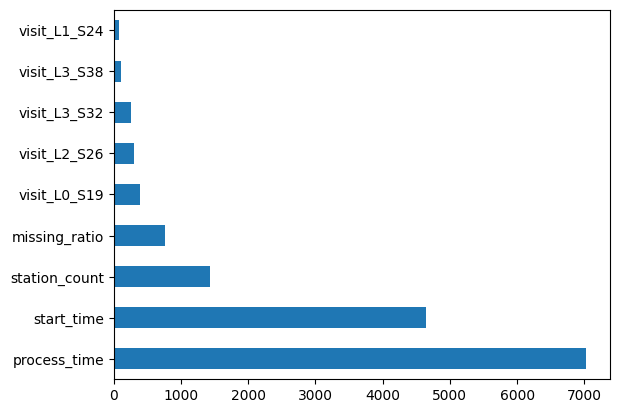

In [55]:
importance.plot(kind="barh")